# Plot and Spikesort an Extracellular Recording

This notebook provides code to:

1. Import the dataset from [this paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0225138)
2. Plot the raw data
3. Determine a reasonable spike threshold
4. Detect spikes based on that threshold
5. Plot the raw waveforms & waveform features for detected spikes

*Note*: This code relies on several helper functions in `spikesorting_helperfunctions.py`. Please make sure this file is in the same folder as this notebook.

<hr>

## Setup

In [3]:
# Import packages we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # configure high-resolution plotting
%run Utilities/spikesorting_helperfunctions.py # import several helper functions for this analysis

## Import xlsx file
This will take ~30 seconds to run.

In [26]:
data_df = pd.read_excel('gerbil_recording.xlsx')
data = np.array(signal_df)
sampling_freq = 24000
signal = data[:,1]
time = data[:,0]
print('Data Imported')

Data Imported


## Plot the raw data

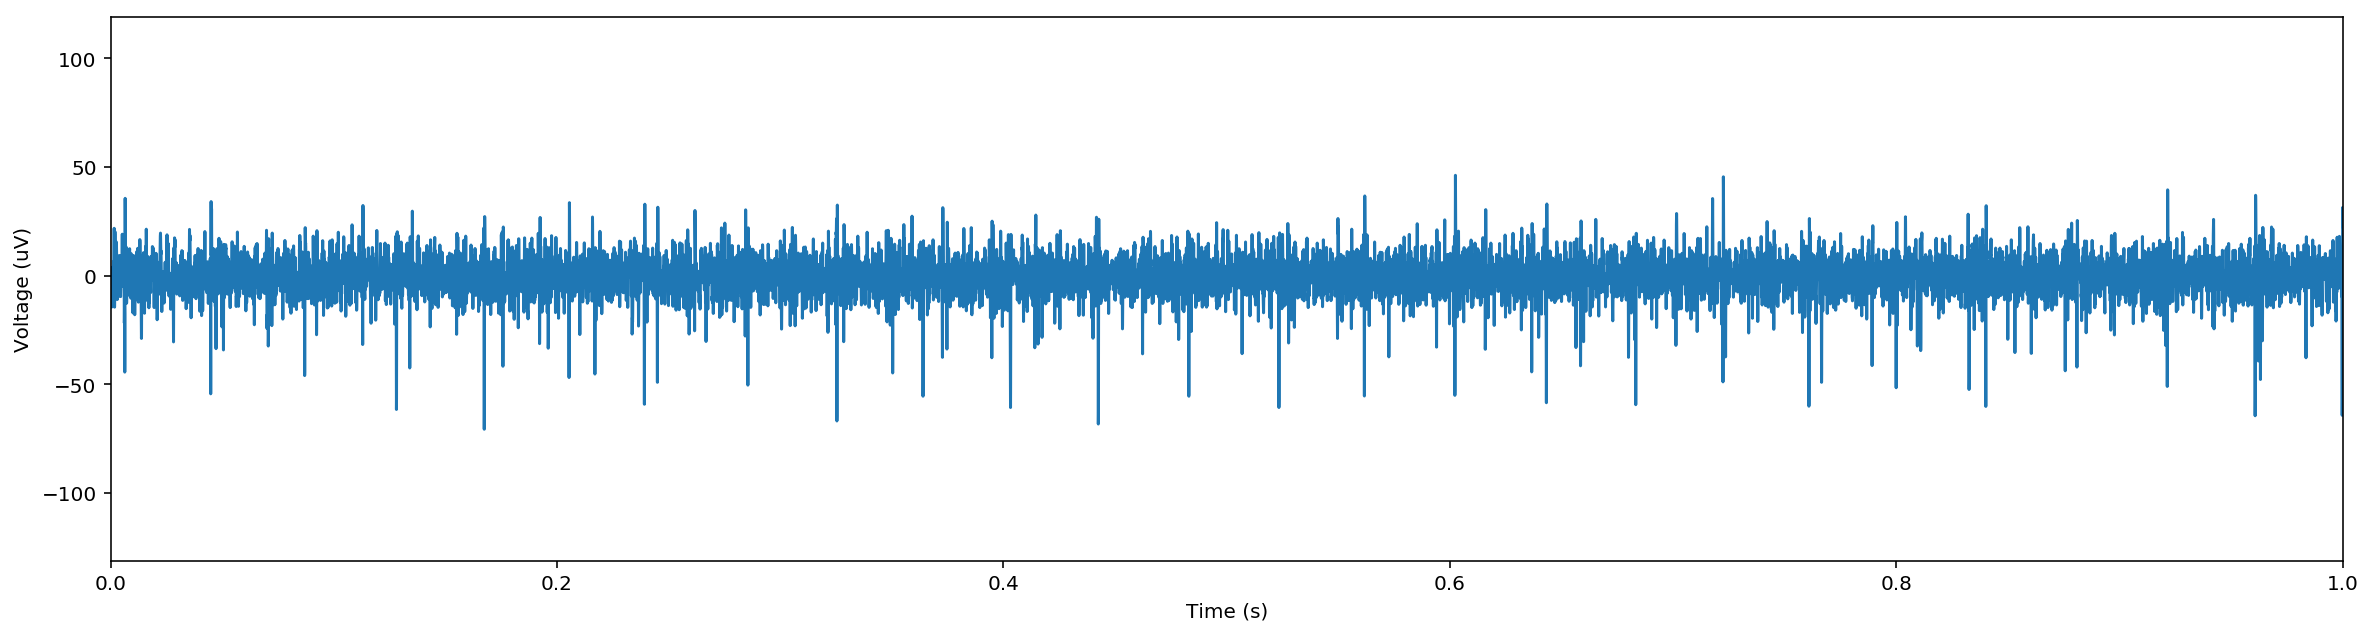

In [18]:
fig = plt.figure(figsize=(20,5))
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.xlim([0,1]) # plot first second of data
plt.show()

In [16]:
noise_std = np.std(signal)
noise_mad = np.median(np.absolute(signal)) / 0.6745
recommended_threshold = -5 * noise_mad
print('Noise Estimate by Standard Deviation: {0:g} V'.format(noise_std))
print('Noise Estimate by MAD Estimator     : {0:g} V'.format(noise_mad))
print('Recommended Spike Threshold         : {0:g} V'.format(recommended_threshold))

Noise Estimate by Standard Deviation: 8.59589 V
Noise Estimate by MAD Estimator     : 7.11638 V
Recommended Spike Threshold         : -35.5819 V


## Determine a reasonable threshold & plot

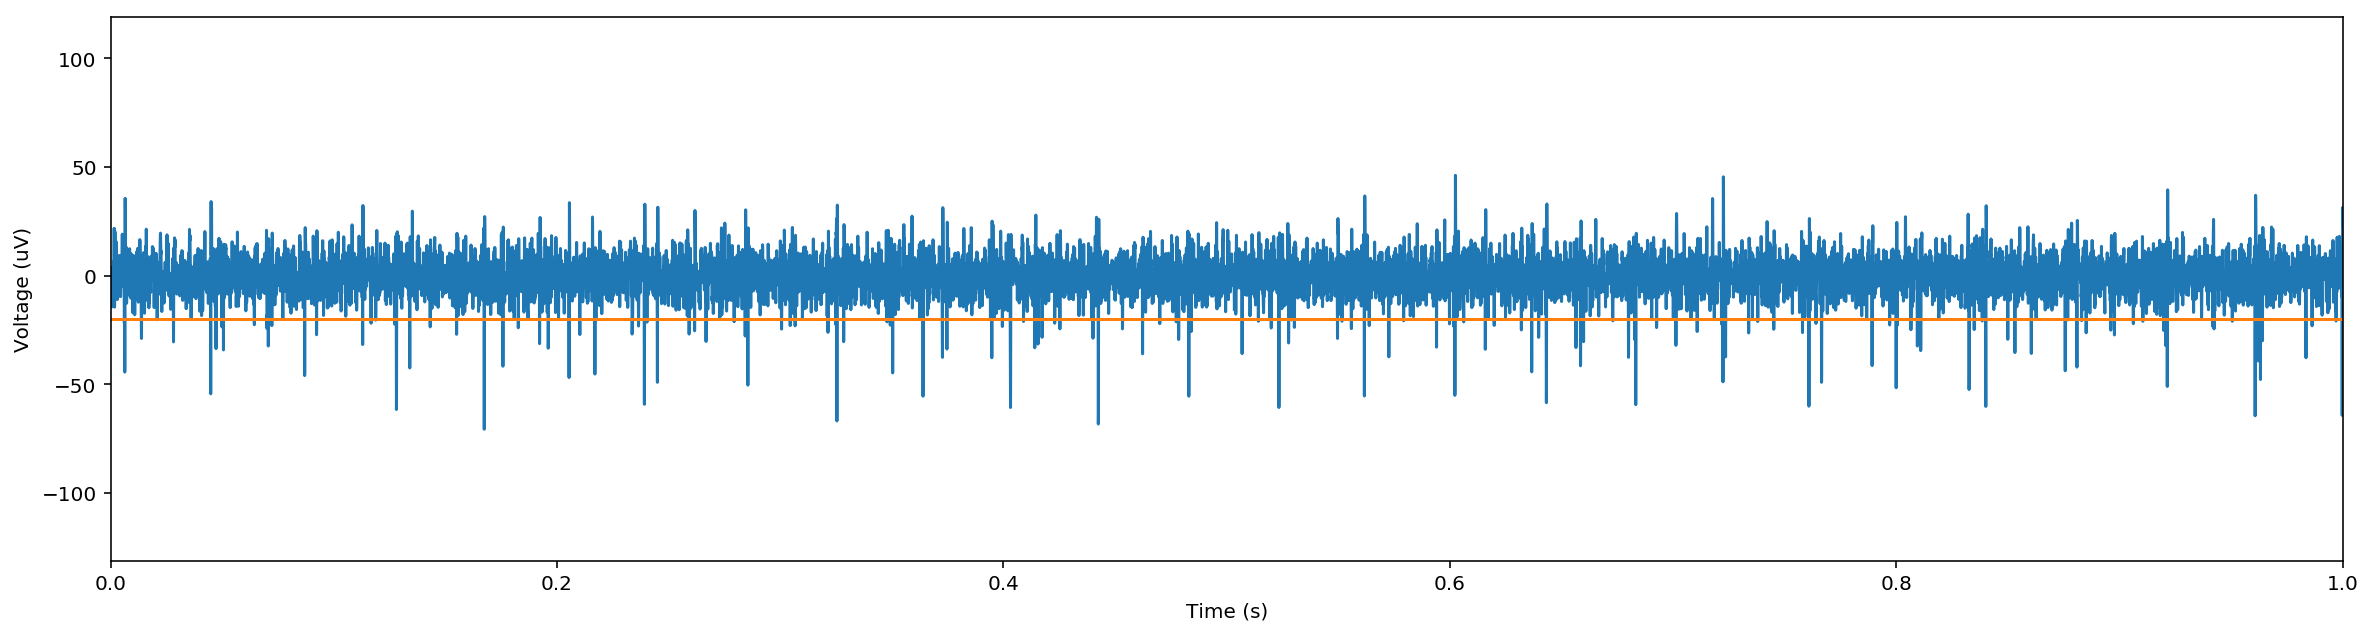

In [31]:
spike_threshold = -20

fig = plt.figure(figsize=(20,5))
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.plot([0, 1], [spike_threshold, spike_threshold]) # add *1e6 to convert the threshold to µV for plotting
plt.xlim([0,1])
plt.show()

## Detect spikes and plot

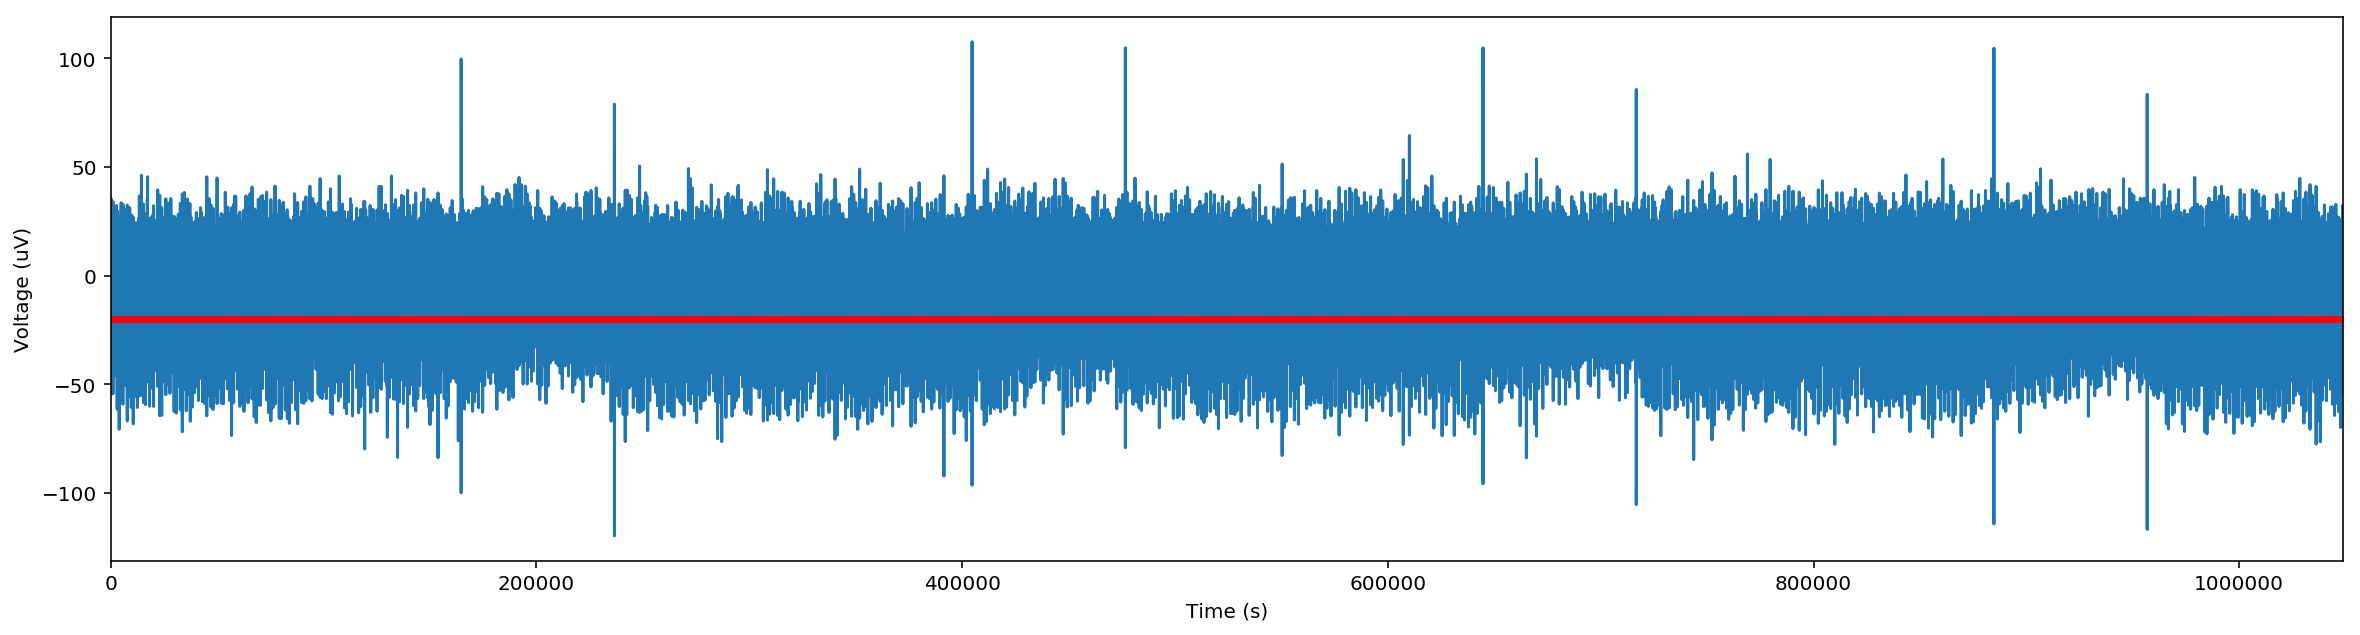

In [32]:
crossings = detect_threshold_crossings(signal, sampling_freq, spike_threshold, 0.003) # dead time of 3 ms
spks = align_to_minimum(signal, sampling_freq, crossings, 0.002) # search range 2 ms

fig = plt.figure(figsize=(20,5))
plt.plot(signal)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.plot(spks,[spike_threshold]*spks.shape[0], 'ro', ms=2)
plt.xlim([0,len(signal)])
plt.show()

## Extract Waveforms

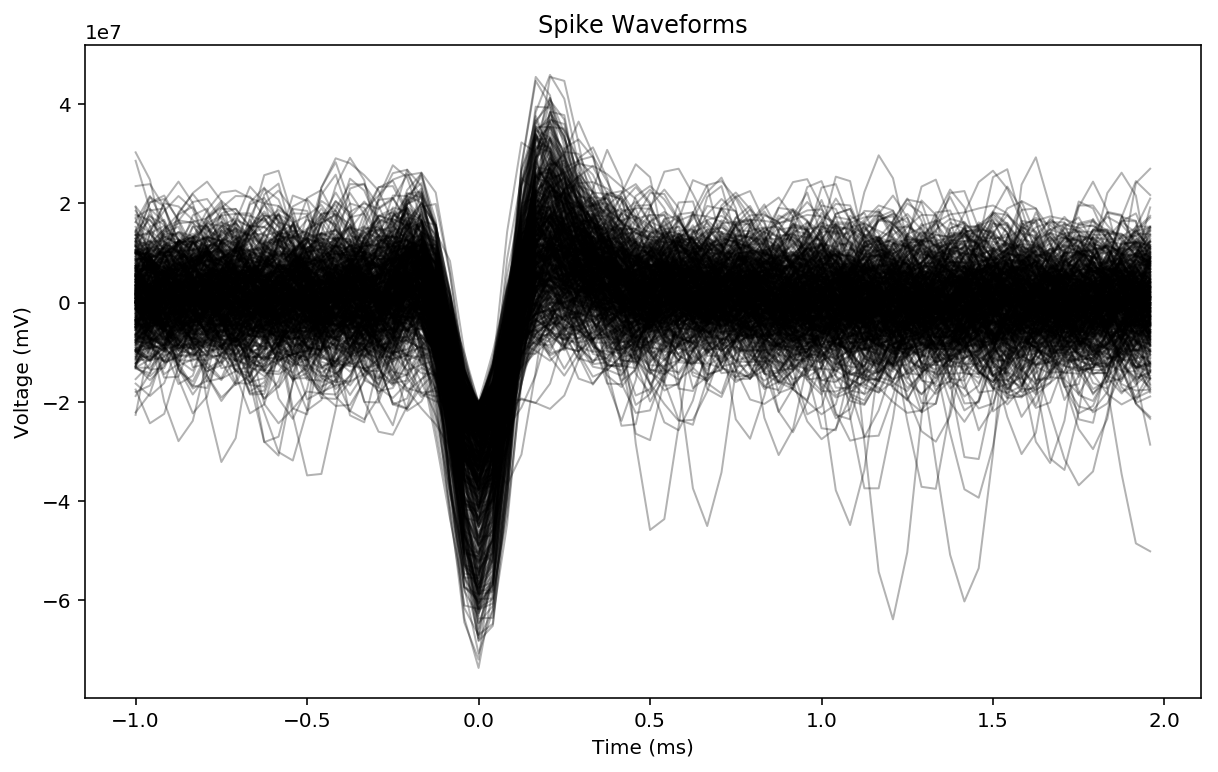

In [38]:
pre = 0.001 # 1 ms
post= 0.002 # 2 ms
waveforms = extract_waveforms(signal, sampling_freq, spks, pre, post)
plot_waveforms(waveforms, sampling_freq, pre, post, n=500)

## Compute autocorrelation

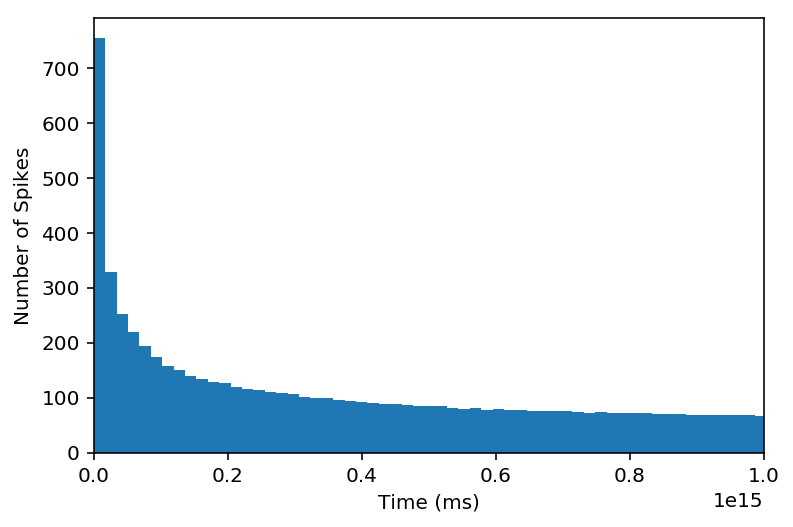

In [45]:
autocorrelation = np.correlate(spks,spks,mode='full')
autocorrelation

plt.hist(autocorrelation,bins=100)
plt.xlim([0,1e15])
plt.ylabel('Number of Spikes')
plt.xlabel('Time (ms)')
plt.show()

## Feature Extraction

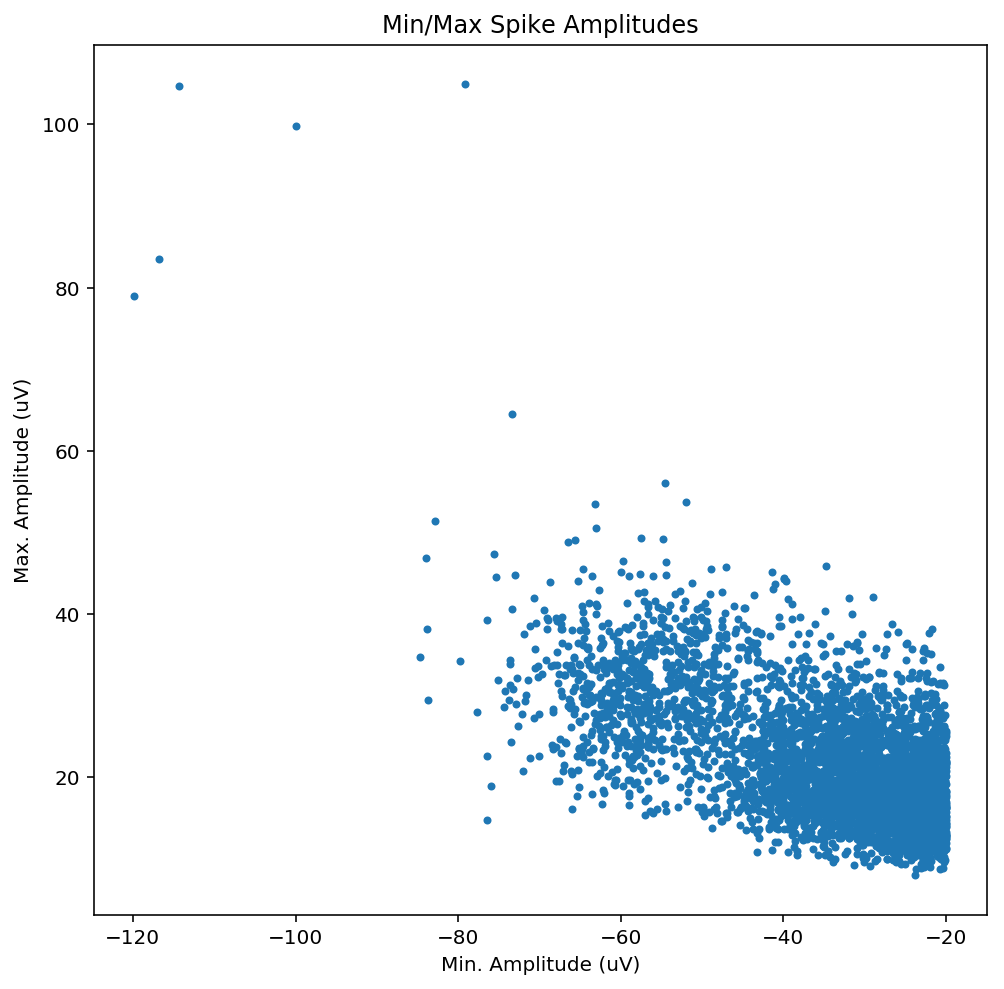

In [46]:
min_amplitude = np.amin(waveforms, axis=1)
max_amplitude = np.amax(waveforms, axis=1)

plt.figure(figsize=(8,8))
plt.plot(min_amplitude, max_amplitude,'.')
plt.xlabel('Min. Amplitude (uV)')
plt.ylabel('Max. Amplitude (uV)')
plt.title('Min/Max Spike Amplitudes')

plt.show()

## About this notebook
This notebook was largely inspired by [this tutorial](https://mcspydatatools.readthedocs.io/en/latest/McsPy-Tutorial_DataAnalysis.html).